In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import math as m
import sympy as sym

1. Generamos un xi que siga una distribución uniforme entre contenido en el intervalo
de integración [a,b].
2. Para xi
, generamos un yi que siga una distribución uniforme entre 0 y el máximo
de f(x).
3. Si yi < f(xi) incluimos el valor xi en la lista, de otro modo, no incluimos el valor xi
.




In [3]:
def function (x,a,b):
  
  return (m.factorial(a+b-1)/(m.factorial(a-1)*m.factorial(b-1)))*x**(a-1)*(1-x)**(b-1)
  

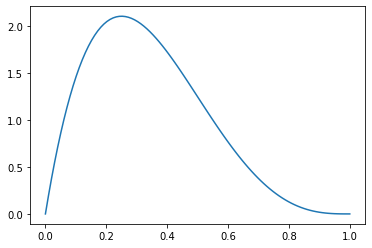

In [13]:
x= np.linspace(0,1,100)
y=function(x,2,4)
max= np.max(y)

plt.plot(x,y)


In [14]:
class MyRandom:
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
        
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt( Npoints )* np.abs( np.mean( array**moment ) - 1/(1+moment) )

In [15]:
rand = MyRandom(seed = 16, method='drand48')


In [16]:
def aceptacion_rechazo(max,n,f):
  a=[]
  r=[]
  for i in range(n):
    xi= rand.Random()
    yi= max*rand.Random()
    y= f(xi,2,4)/max
    if yi<=y:
      a.append(xi)
    else:
      r.append(xi)
  return a,r

n=1000
a,r=aceptacion_rechazo(max,n,function)
print(a)
print(r)

[0.3289206611557809, 0.23984350471306115, 0.319032360377026, 0.20173553982823833, 0.45217650393028563, 0.2215233651021613, 0.2346734543933131, 0.389492837912659, 0.6638468165182054, 0.37718563499286617, 0.38219753609905993, 0.14301624229634413, 0.24532991882452038, 0.1907985149676783, 0.23945705410283225, 0.40866043150891684, 0.24060460960362562, 0.34620915768421057, 0.12724880427331087, 0.6330812437181486, 0.44926474134200944, 0.3776490949388922, 0.14359416712697382, 0.058253691107506, 0.11742877014401287, 0.5862475149508377, 0.1603914641245261, 0.26477619629772065, 0.4105016962235446, 0.4426171319557106, 0.22503315233081977, 0.20910802045327515, 0.2713879487957236, 0.47041690193708163, 0.30278267843069173, 0.623375368065755, 0.3087708313207962, 0.5051339403947956, 0.35601324349893915, 0.49713144850883495, 0.429925325663735, 0.5729930554818914, 0.6910426369021145, 0.1520212745153735, 0.16272320816795016, 0.31031834823228266, 0.6462374723976971, 0.3238771609012012, 0.1754707237334081, 

In [17]:
def aceptacion_rechazo(max,n,f):
  a=[]
  Y=[]
  for i in range(n):
    xi= rand.Random()
    yi= max*rand.Random()
    y= f(xi,2,4)
    if yi<y:
      a.append(xi)
      Y.append(yi)
  return a,Y

n=1000
a,Y=aceptacion_rechazo(max,n,function)
print(a)
print(Y)


[0.3229438299803782, 0.40742855002806877, 0.3389546786287134, 0.3035780169795821, 0.11852071363221128, 0.2928156300638456, 0.4647174957286033, 0.29635423518044846, 0.43453601359687966, 0.3743557732981593, 0.30571141060395846, 0.6724799693461669, 0.49986450841921126, 0.2244807458698368, 0.6516818801817728, 0.3579499938725057, 0.40844753422231506, 0.06572945649697814, 0.17897079866768806, 0.20149899811538674, 0.40363662596647387, 0.3838471942804027, 0.22793517158283905, 0.18303571500259963, 0.6197073119039693, 0.6340943817164124, 0.4453124129744701, 0.272711635657398, 0.153333155849797, 0.6126671561344459, 0.4855689789181703, 0.21658062578938697, 0.5091919294460148, 0.5236108086607594, 0.13443419175486682, 0.2960758372367813, 0.05423806434832912, 0.5971280040039879, 0.1147498255431465, 0.6350990119555853, 0.375629576277138, 0.467361205340719, 0.17723703989211614, 0.23567990801227623, 0.05962594750934258, 0.3242317629114986, 0.3319268747225941, 0.2860651304917248, 0.28341423884511485, 0.2

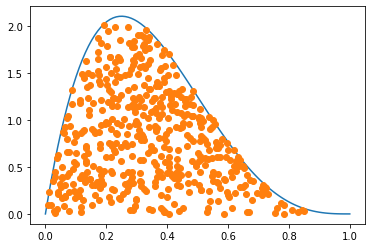

In [18]:
plt.plot(x,y)
plt.plot(a,Y,"o")

0.3385210408180148